Álvaro Pérez de Rojas
 # Práctica 1 de Machine Learning, Modelos Supervisados
 

#### Índice
<ol>
    <li><a href="#p_1" >Pregunta 1</a></li>
    <li><a href="#p_2">Pregunta 2</a></li>
    <li><a href="#p_3">Pregunta 3</a></li>
    <li><a href="#p_4">Pregunta 4</a></li>
    <li><a href="#p_5">Pregunta 5</a></li>
    <li><a href="#p_6">Pregunta 6</a></li>
    <li><a href="#p_7">Pregunta 7</a></li>
 
 </ol>

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

<h2 id="p_1">Pregunta 1</h2>

Hacer un pequeño análisis descriptivo de los datos. Un análisis sencillo que incluya simplemente: (0,5 pts)
- Cantidad de valores nulos.
- Tipo de variables (cat, float, etc.)
- En la variable objetivo, distribución de sus valores.
- Matriz de correlación en variables continuas.

    - Lectura

In [2]:
df = pd.read_csv('pd_data_initial_preprocessing.csv').sample(200000, random_state = 123)
df.head(2)

C:\Users\alvar\AppData\Local\Temp\ipykernel_6428\1008487478.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pd_data_initial_preprocessing.csv').sample(200000, random_state = 123)


,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
616531,59033332,https://lendingclub.com/browse/loanDetail.acti...,078xx,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,w,Individual,0.0,0.0,19000.0,1.0,275.0,8.0,9.0,1992.0
392296,15359480,https://lendingclub.com/browse/loanDetail.acti...,481xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,f,Individual,0.0,0.0,25000.0,0.0,97.0,13.0,3.0,2006.0


    - Descripcion

In [3]:
df.describe(include = 'all')

,id,url,zip_code,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,...,initial_list_status,application_type,pub_rec,pub_rec_bankruptcies,loan_amnt,mort_acc,mo_sin_old_rev_tl_op,open_acc,earliest_cr_line_month,earliest_cr_line_year
count,200000.0,199997,199997,34847.000000,48856.000000,50925.000000,54771.000000,56328.000000,56329.000000,56329.000000,...,199997,199997,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000,199997.000000
unique,200000.0,199997,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,59033332.0,https://lendingclub.com/browse/loanDetail.acti...,750xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,w,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1.0,1,2102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128746,195131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,69.301174,68.849026,39.164772,21.382027,58.162867,0.987218,5730.432708,...,NaN,NaN,0.224383,0.134247,14996.067816,1.658735,184.609299,11.826897,6.744761,1998.590879
std,NaN,NaN,NaN,26.424752,24.352109,22.759643,25.689458,20.943595,1.461483,5295.255112,...,NaN,NaN,0.614850,0.381439,8792.123702,1.976982,95.635147,5.586369,3.365988,7.715024
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.000000,1000.000000,0.000000,3.000000,0.000000,1.000000,1950.000000
25%,NaN,NaN,NaN,51.000000,54.000000,20.000000,7.000000,44.000000,0.000000,2298.000000,...,NaN,NaN,0.000000,0.000000,8000.000000,0.000000,119.000000,8.000000,4.000000,1995.000000
50%,NaN,NaN,NaN,69.000000,71.000000,37.000000,14.000000,59.000000,0.000000,4391.000000,...,NaN,NaN,0.000000,0.000000,13125.000000,1.000000,167.000000,11.000000,7.000000,2000.000000
75%,NaN,NaN,NaN,88.000000,85.000000,58.000000,24.000000,73.000000,1.000000,7475.000000,...,NaN,NaN,0.000000,0.000000,20000.000000,3.000000,235.000000,15.000000,10.000000,2004.000000


    - Bloques de variables y categorias

In [4]:
# Separo las columnas en dos bloques

continuas =  ["open_act_il", "all_util", "annual_inc", "dti", "emp_length", "fico_range_high", "fico_range_low", "il_util", "inq_fi", "inq_last_12m", "installment", "int_rate", "loan_amnt", "max_bal_bc", "mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mort_acc", "mths_since_last_delinq", "mths_since_last_major_derog", "mths_since_last_record", "mths_since_rcnt_il", "mths_since_recent_bc_dlq", "mths_since_recent_revol_delinq", "open_acc", "open_acc_6m", "open_il_12m", "open_il_24m", "open_rv_12m", "open_rv_24m", "pub_rec", "pub_rec_bankruptcies", "revol_util", "term", "total_acc", "total_bal_il", "total_cu_tl", "earliest_cr_line_month", "earliest_cr_line_year"]
discretas = ['id', 'url', 'zip_code', 'emp_title', 'verification_status', 'home_ownership', 'grade', 'sub_grade', 'loan_status', 'purpose', 'addr_state', 'application_type', 'initial_list_status']


( # Compruebo que la separacion este bien hecha
[item for item in list(df.columns) if item not in (continuas + discretas)],
[item for item in continuas if item in discretas],
[item for item in discretas if item in continuas]
)

([], [], [])

In [5]:
# Compruebo que los bloques anteriores coincidan con las categorias en que se han almacenado las variables

b = pd.DataFrame(df.dtypes) # Creo un dataframe donde contrastar la categoria actual vs la deseada
b = b.rename(columns = {b.columns[0]: 'type'})
b['tipo_en_df'] = b['type'].astype(str)
b = b.drop(columns = ['type'], axis = 1).reset_index()

def f_1(row): # Anado la categoria deseada en funcion si es discreta o continua
    if row['index'] in discretas:
        val = 'discreta'
    elif row['index'] in continuas:
        val = 'continua'
    else:
        val = 'error'
    return val
b['cont_o_disct'] = b.apply(f_1, axis=1)

def f_2(row): # Hago el contraste entre la deseada (cont o disc) y la actual del df
    if row['tipo_en_df'] == 'object':
        if row['cont_o_disct'] == 'discreta':
            val = 'no_cambiar'
        else:
            val = 'error'
    elif row['tipo_en_df'] == 'float64':
        if row['cont_o_disct'] == 'continua':
            val = 'no_cambiar'
        else:
            val = 'error'
    else:
        val = 'error'
    return val
b['revesion'] = b.apply(f_2, axis=1)


b[(b['revesion'] == 'error')] # Imprimo los casos en que hay discrepaciancias entre lo actual y lo deseado

,index,tipo_en_df,cont_o_disct,revesion
30,sub_grade,float64,discreta,error


In [6]:
df['sub_grade'] = df['sub_grade'].astype('str') # Cambio la variable que quiero pasar a categorica

    - Distribucion de valores de la variable objetivo

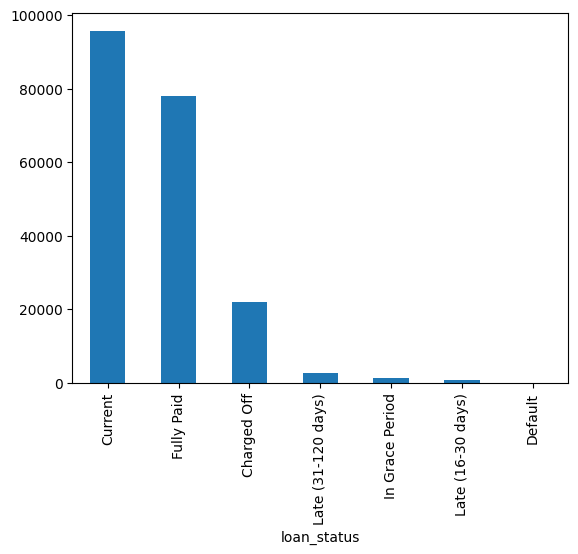

In [7]:
df['loan_status'].value_counts().plot(kind = 'bar')

plt.show()

    - Matriz de correlacion

In [8]:
pd.get_dummies(df[(continuas + list(['loan_status']))].copy()).corr().iloc[0:-8, -8:].sort_values('loan_status_Fully Paid', ascending = False)

,earliest_cr_line_year,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
mort_acc,-0.293164,-0.035098,-0.057054,-0.001276,0.086713,-0.008647,-0.005427,-0.016196
total_acc,-0.274444,0.018124,-0.075069,-0.000334,0.066479,-0.002039,0.001390,-0.004322
open_il_12m,-0.014741,0.045340,-0.085410,NaN,0.061406,0.009136,0.017193,0.032355
open_il_24m,-0.003907,0.044563,-0.080072,NaN,0.057685,0.013553,0.011222,0.027263
inq_last_12m,0.024087,0.033295,-0.076445,NaN,0.053706,0.008969,0.018192,0.036803
mths_since_recent_bc_dlq,0.000444,0.013777,-0.054584,0.000731,0.052188,-0.011084,-0.007551,-0.011316
open_acc_6m,-0.014612,0.048171,-0.073054,NaN,0.049311,0.004366,0.018859,0.026079
mths_since_recent_revol_delinq,0.015610,0.009426,-0.038483,0.001583,0.039987,-0.011998,-0.009417,-0.014188
total_cu_tl,-0.055028,0.003369,-0.036131,NaN,0.036199,0.007783,0.003066,0.005065
inq_fi,0.027880,0.020453,-0.053485,NaN,0.035278,0.017119,0.012603,0.026206


In [203]:
ejemplo =  ['grade', 'home_ownership', 'verification_status', 'initial_list_status',
       'purpose', 'addr_state', 'application_type', 'loan_status',
       'total_acc_input', 'fico_range_high_input',
       'mo_sin_old_rev_tl_op_input', 'pub_rec_bankruptcies_input',
       'sub_grade_input', 'mths_since_last_record_input', 'loan_amnt_input',
       'earliest_cr_line_month_input', 'mo_sin_old_il_acct_input',
       'installment_input', 'earliest_cr_line_year_input', 'term_input',
       'mths_since_recent_revol_delinq_input', 'mths_since_last_delinq_input',
       'fico_range_low_input', 'mths_since_last_major_derog_input',
       'revol_util_input', 'mths_since_recent_bc_dlq_input', 'dti_input',
       'emp_length_input', 'open_acc_input', 'pub_rec_input',
       'annual_inc_input', 'mort_acc_input', 'int_rate_input']

[item for item in list(df.columns) if item not in ejemplo]

['id',
 'url',
 'zip_code',
 'mths_since_last_record',
 'il_util',
 'mths_since_recent_bc_dlq',
 'mths_since_rcnt_il',
 'all_util',
 'inq_fi',
 'max_bal_bc',
 'total_cu_tl',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'total_bal_il',
 'open_rv_12m',
 'open_rv_24m',
 'open_il_24m',
 'inq_last_12m',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'mths_since_last_delinq',
 'emp_title',
 'emp_length',
 'mo_sin_old_il_acct',
 'revol_util',
 'dti',
 'annual_inc',
 'sub_grade',
 'term',
 'int_rate',
 'installment',
 'total_acc',
 'fico_range_low',
 'fico_range_high',
 'pub_rec',
 'pub_rec_bankruptcies',
 'loan_amnt',
 'mort_acc',
 'mo_sin_old_rev_tl_op',
 'open_acc',
 'earliest_cr_line_month',
 'earliest_cr_line_year']

<h2 id="p_2">Pregunta 2</h2>

Tratar los valores missing tanto en las variables continuas como discretas de forma correcta. Recordad que si existen muchos valores missing no es adecuado eliminar dichas filas. Como guía, recordad que los valores missing: (0,5 pts)

- En variables continuas se puede  sustituir por  la media o mediana, o por un valor muy distinto al resto de cantidades, que refleje que de algún modo que es un valor missing.
- En variables discretas se pueden sustituir por la moda o una clase nueva que indique que no tienen valor, p.e. “SIN VALOR”.
- Puede ser interesante, estudiar y evaluar algunos de los métodos de la librería sklearn.impute, como por ejemplo sklearn.impute.KNNimpute, que realiza una imputación mediante una regresión con KNN.

    - Tratamiento de valores missing/ nulos

In [9]:
# Identificacion de valores nulos

nulos = pd.DataFrame(df.isnull().sum().loc[lambda x : x != 0], columns = ['N_null']).sort_values('N_null', ascending = False).reset_index()
nulos['%_null'] = nulos['N_null'] * 100 / df.shape[0]
nulos = nulos.merge(b, on = 'index', how = 'left').iloc[:, 0:4]

nulos.head(5)

,index,N_null,%_null,tipo_en_df
0,mths_since_last_record,165153,82.5765,float64
1,il_util,151144,75.5720,float64
2,mths_since_recent_bc_dlq,149075,74.5375,float64
3,mths_since_rcnt_il,145229,72.6145,float64
4,all_util,143672,71.8360,float64


In [10]:
# Hago la conversion de los nulos en un DF nuevo
df2 = df.copy()

In [11]:
# Supresion de nulos en categoricas

discretas_con_nulos = list(nulos[(nulos['tipo_en_df'] == 'object')].iloc[:, 0]) # De las columnas con nulos, selecciono las no continuas

df2[discretas_con_nulos] = df2[discretas_con_nulos].fillna('nulo') # Para las variables en cuestion, inserto un string que sustituya los valores nulos

In [12]:
# Supresion de nulos en continuas con muchos nulos (defino el alto nivel de nulos en mayor o igual al 1%)

continuas_mas_nulos = list(nulos[((nulos['tipo_en_df'] == 'float64') & ((nulos['%_null'] >= 1)))].iloc[:, 0]) # Selecciono las continuas con mas nulos

for value in continuas_mas_nulos: # Reemplazo los nulos por valores atipicos muy altos, especificos para cada variable
    Q1 = df2[value].quantile(0.25)
    Q3 = df2[value].quantile(0.75)
    k = round( Q3 + 1500 * (Q3 - Q1), 0)
    df2[value] = df2[value].fillna(k)

In [13]:
# Supresion de nulos en continuas con pocos nulos (defino el alto nivel de nulos en menos del 1%)

continuas_menos_nulos = list(nulos[((nulos['tipo_en_df'] == 'float64') & ((nulos['%_null'] < 1)))].iloc[:, 0]) # Selecciono las continuas con menos nulos

for value in continuas_menos_nulos: # Reemplazo los nulos por valores medios de cada variable
    k = round(np.nanmean(df2['revol_util']), 0)
    df2[value] = df2[value].fillna(k)

In [14]:
# Compruebo la correcta sustitucion de todos los valores nulos
nulos_2 = pd.DataFrame(df2.isnull().sum().loc[lambda x : x != 0], columns = ['N_null'])
nulos_2

,N_null


<h2 id="p_3">Pregunta 3</h2>

Transformar las variables continuas, si fuera necesario, y las categóricas correctamente. (0,5 pts)

    - Transformación discretas

In [15]:
df2[discretas].nunique()

id                     200000
url                    199998
zip_code                  888
emp_title               65613
verification_status         4
home_ownership              5
grade                       8
sub_grade                   6
loan_status                 8
purpose                    15
addr_state                 51
application_type            3
initial_list_status         3
dtype: int64

In [16]:
a = (df2['emp_title'].str.lower() # Intento agrupar manualmente los trabajos con nombres mas similares
                    .str.replace(r'.*manager.*', 'manager', case = False)
                    .str.replace(r'.*management.*', 'manager', case = False)
                    .str.replace(r'.*driver.*', 'driver', case = False)
                    .str.replace(r'.*assistant.*', 'assistant', case = False)
                    .str.replace(r'.*secretary.*', 'secretary', case = False)
                    .str.replace(r'.*receptionist.*', 'secretary', case = False)
                    .str.replace(r'.*nurse.*', 'nurse', case = False)
                    .str.replace(r'.*rn.*', 'nurse', case = False)
                    .str.replace(r'.*lpn.*', 'nurse', case = False)
                    .str.replace(r'.*bookkeeper.*', 'accountant', case = False)
                    .str.replace(r'.*accountant.*', 'accountant', case = False)
                    .str.replace(r'.*accounting.*', 'accountant', case = False)
                    .str.replace(r'.*vp.*', 'vice president', case = False)
                    .str.replace(r'.*developer.*', 'developer', case = False)
                    .str.replace(r'.*programmer.*', 'programmmer', case = False)
                    .str.replace(r'.*engineer.*', 'engineer', case = False)
                    .str.replace(r'.*sales.*', 'sales', case = False)
                    .str.replace(r'.*executive.*', 'executive', case = False)
                    )

a2 = pd.DataFrame(a)
a2= (a2.merge(pd.DataFrame(a2['emp_title'].value_counts().reset_index()), on = 'emp_title', how = 'left')) # Asocio los trabajos con su numero de repeticiones


def f_4(row): # Los empleos con menos valores pasan a "otros"
    if row['count'] < 200:
        val = 'otros'
    else:
        val = row['emp_title'] 
    return val
a2['emp_title'] = a2.apply(f_4, axis=1)

a2.nunique()


emp_title     84
count        240
dtype: int64

In [17]:
df2['emp_title'] = a2['emp_title'] # Aplico el cambio al DF de trabajo
df2[discretas].nunique()

id                     200000
url                    199998
zip_code                  888
emp_title                  84
verification_status         4
home_ownership              5
grade                       8
sub_grade                   6
loan_status                 8
purpose                    15
addr_state                 51
application_type            3
initial_list_status         3
dtype: int64

In [120]:
#(df2['zip_code']).str.lower().value_counts().iloc[0:60].sum()/ df2.shape[0]

In [18]:
# Hago lo mismo para la variables de los codigos postales

a2 = pd.DataFrame(df2['zip_code'])
a2= (a2.merge(pd.DataFrame(a2['zip_code'].value_counts().reset_index()), on = 'zip_code', how = 'left')) # Asocio los codigos postales con su numero de repeticiones

def f_4(row): # Los empleos con menos valores pasan a "otros"
    if row['count'] < 200:
        val = 'otros'
    else:
        val = row['zip_code'] 
    return val
a2['zip_code'] = a2.apply(f_4, axis=1)

df2['zip_code'] = a2['zip_code'] # Aplico el cambio al DF de trabajo
df2[discretas].nunique()

id                     200000
url                    199998
zip_code                  300
emp_title                  84
verification_status         4
home_ownership              5
grade                       8
sub_grade                   6
loan_status                 8
purpose                    15
addr_state                 51
application_type            3
initial_list_status         3
dtype: int64

In [19]:
# Para el motivo del prestamo, como solo hay 4 observaciones sueltas, elimino esas filas que no representan una cantidad significativa
df2['purpose'].value_counts()

purpose
debt_consolidation    117419
credit_card            46087
home_improvement       13051
other                  10167
major_purchase          3856
medical                 2192
car                     1837
small_business          1804
vacation                1389
moving                  1288
house                    804
renewable_energy         101
nulo                       3
educational                1
wedding                    1
Name: count, dtype: int64

In [20]:
# Eliminacion
df2 = df2[~df2['purpose'].isin(['nulo', 'educational', 'wedding'])]

In [21]:
# Procedo a eliminar tambien el valor suelto de home ownership
df2['home_ownership'].value_counts()

home_ownership
MORTGAGE    99478
RENT        78985
OWN         21530
ANY             2
Name: count, dtype: int64

In [22]:
df2 = df2[~df2['home_ownership'].isin(['ANY'])]

<h2 id="p_4">Pregunta 4</h2>

- Partir el conjunto de datos en un subconjunto de entrenamiento y otro de test. Recordad, que si la variable objetivo está desbalanceada, es fundamental, realizar una partición que conserve las proporciones originales en cada subconjunto. (0,5pt)

In [23]:
# Seleccion de valores target

df2 = df2[df2['loan_status'].isin(['Current', 'Fully Paid'])].replace({'Current':0, 'Fully Paid':1})

In [24]:
# Balanceo de la variable target

n_balance = min(df2.shape[0]-sum(df2['loan_status']), sum(df2['loan_status'])) # Numero de observaciones maximo en ambas observaciones

df2 = pd.concat([df2[df2['loan_status'] == 0].sample(n_balance, random_state = 123),
                 df2[df2['loan_status'] == 1].sample(n_balance, random_state = 123)
                 ])

df2 = df2.sample(df2.shape[0], random_state = 123) # Mezcla de observaciones despues de la seleccion de balanceo

In [25]:
train_data, test_data = train_test_split(df2, test_size = 0.4, random_state = 123, stratify = df2.loan_status)

    - Transformacion de varialbes (correspondiente a preg. 3) Dummies y estandarizacion

In [26]:
# Paso las variables categoricas a dummie

discretas_2 = discretas.copy()
discretas_2.remove('loan_status')
discretas_2

train_data = pd.get_dummies(train_data, columns = (discretas_2[2:])) # Excluyo el identificador y la url
test_data = pd.get_dummies(test_data, columns = (discretas_2[2:])) # Excluyo el identificador y la url

train_data.head(2)

,id,url,mths_since_last_record,il_util,mths_since_recent_bc_dlq,mths_since_rcnt_il,all_util,inq_fi,max_bal_bc,total_cu_tl,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Individual,application_type_Joint App,initial_list_status_f,initial_list_status_w
285124,28554539,https://lendingclub.com/browse/loanDetail.acti...,55588.0,46585.0,57058.0,25524.0,43573.0,1501.0,7772975.0,3002.0,...,False,False,False,False,False,False,True,False,False,True
94681,105052308,https://lendingclub.com/browse/loanDetail.acti...,59.0,65.0,57058.0,30.0,61.0,2.0,1371.0,0.0,...,False,False,False,False,False,False,True,False,True,False


In [27]:
train_norm = train_data.copy()
test_norm = test_data.copy()

scaler = StandardScaler().fit(train_norm.iloc[:, 2:])
#.iloc[:, 2:]
train_norm.iloc[:, 2:] = scaler.transform(train_norm.iloc[:, 2:])
test_norm.iloc[:, 2:] = scaler.transform(test_norm.iloc[:, 2:])

<h2 id="p_5">Pregunta 5</h2>

Vamos ha evaluar diferentes algoritmos de clasificación, para los cuales necesitaremos hacer los siguientes pasos:
- Realizar algún tipo de transformación como escalado o normalización, si el método lo necesita.
- Entrenar el modelo con el conjunto de datos de entrenamiento.
- Mostrar cómo de bueno ha sido el entrenamiento.
- Evaluar el modelo con el conjunto de datos de test. Para ellos se pedirán las siguiente métricas:
  - Accuracy
  - Precision
  - Recall
  - Confusion Matrix
  - F-SCORE
  - Curva ROC
  - Area bajo la curva.

- Todos estos pasos serán necesarios evaluarlos para cada uno de los siguientes algoritmos:
  - A.	Regresión logística (1 pt)
  - B.	K-NN (1pt)
  - C.	Arbol de decisión simple (1pt)
  - D.	Bagging Classifier (1pt)
  - E.	Random Forest (1pt)
  - F.	GradientBoost (1pt)
  - G.	XGBoost. (1pt)

    - Preparacion DFs y seleccion de variable objetivo

In [29]:
non_targets = list(train_norm.columns)
non_targets.remove('loan_status')

X_train = train_norm[non_targets].iloc[:, 2:]
y_train = train_norm['loan_status']

X_test = test_norm[non_targets].iloc[:, 2:]
y_test = test_norm['loan_status']

    - Regresion logistica

In [42]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
#lr.fit(train_norm[non_targets].iloc[:, 2:], train_norm[targets[0]].astype('str'))

C:\Users\alvar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# Accuracy
lr_accuracy = lr.score(X_train, y_train)
lr_accuracy

0.7541753095395932

In [44]:
# Precision
lr_precision = precision_score(y_test, lr.predict(X_test))
lr_precision

0.7147620739606965

In [45]:
# Recall
lr_recall = recall_score(y_test, lr.predict(X_test))
lr_recall

0.8388183217859893

In [46]:
# Matriz de confusion
lr_m_confs = confusion_matrix(y_test, lr.predict(X_test))
lr_m_confs

array([[20740, 10436],
       [ 5025, 26151]], dtype=int64)

In [47]:
# F-score
lr_f_score = f1_score(y_test, lr.predict(X_test))
lr_f_score

0.771837138261293

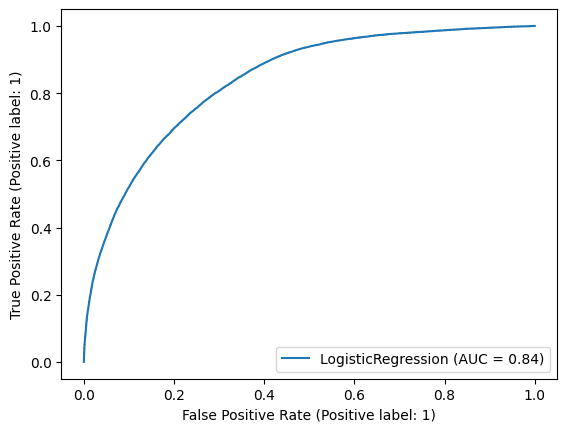

In [55]:
# Curva ROC

# clf = LogisticRegression().fit(X_train, y_train)
lr_roc = RocCurveDisplay.from_estimator(lr ,X_test, y_test)
lr_roc

In [56]:
# Area bajo la curva ROC

# roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
lr_auc

0.8383357214569755

In [61]:
# Balanced accuracy

lr_b_acc = balanced_accuracy_score(y_test, lr.predict(X_test))
lr_b_acc

0.7520368231973313

In [129]:
data = {'Reg_Logistica': [lr_accuracy, lr_precision, lr_recall, lr_m_confs, lr_f_score, lr_auc, lr_b_acc]}
index = ['accuracy', 'precision', 'recall', 'confusion_matrix', 'f1_score', 'auc', 'balanced_accuracy']
regresion_logistica = pd.DataFrame(data=data, index=index)
regresion_logistica

,Reg_Logistica
accuracy,0.754175
precision,0.714762
recall,0.838818
confusion_matrix,"[[20740, 10436], [5025, 26151]]"
f1_score,0.771837
auc,0.838336
balanced_accuracy,0.752037


    - K-NN

In [69]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [70]:
y_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.6963690017962535

In [71]:
# Precision

knn_precision = precision_score(y_test, y_pred)
knn_precision

0.6772745699889964

In [72]:
# Recall

knn_recall = recall_score(y_test, y_pred)
knn_recall

0.7502245316910444

In [73]:
# Matriz de confusion

knn_m_confs = confusion_matrix(y_test, y_pred)
knn_m_confs

array([[20031, 11145],
       [ 7787, 23389]], dtype=int64)

In [76]:
# F-score

knn_f_score = f1_score(y_test, y_pred)
knn_f_score

0.7118855577537666

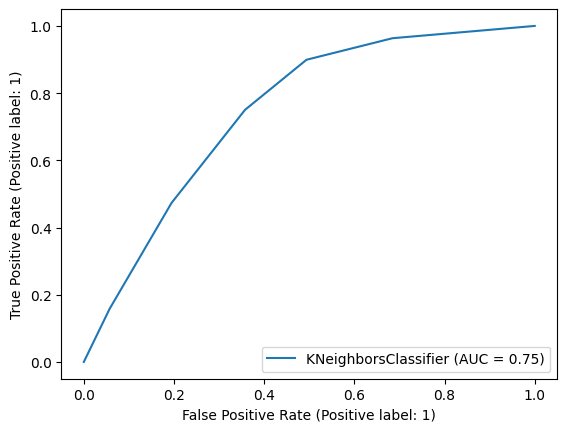

In [74]:
# Curva ROC

knn_roc = RocCurveDisplay.from_estimator(knn, X_test, y_test)
knn_roc

In [75]:
# Area bajo la curva ROC

knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
knn_auc

0.747299240732411

In [77]:
# Balanced accuracy

knn_b_acc = balanced_accuracy_score(y_test, y_pred)
knn_b_acc

0.6963690017962536

In [130]:
data = {'K-NN': [knn_accuracy, knn_precision, knn_recall, knn_m_confs, knn_f_score, knn_auc, knn_b_acc]}
index = ['accuracy', 'precision', 'recall', 'confusion_matrix', 'f1_score', 'auc', 'balanced_accuracy']
knn = pd.DataFrame(data=data, index=index)
modelos_acc = pd.merge(regresion_logistica, knn, left_index=True, right_index=True)
modelos_acc

,Reg_Logistica,K-NN
accuracy,0.754175,0.696369
precision,0.714762,0.677275
recall,0.838818,0.750225
confusion_matrix,"[[20740, 10436], [5025, 26151]]","[[20031, 11145], [7787, 23389]]"
f1_score,0.771837,0.711886
auc,0.838336,0.747299
balanced_accuracy,0.752037,0.696369


    - Arbol de decicision simple

In [86]:
dtc = DecisionTreeClassifier(max_depth = 4)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [87]:
y_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, y_pred)
dtc_accuracy

0.7455895560687709

In [88]:
# Precision

dtc_precision = precision_score(y_test, y_pred)
dtc_precision

0.7060248096224739

In [89]:
# Recall

dtc_recall = recall_score(y_test, y_pred)
dtc_recall

0.8416089299461124

In [90]:
# Matriz de confusion

dtc_m_confs = confusion_matrix(y_test, y_pred)
dtc_m_confs

array([[20251, 10925],
       [ 4938, 26238]], dtype=int64)

In [91]:
# F-score

dtc_f_score = f1_score(y_test, y_pred)
dtc_f_score

0.7678777857445968

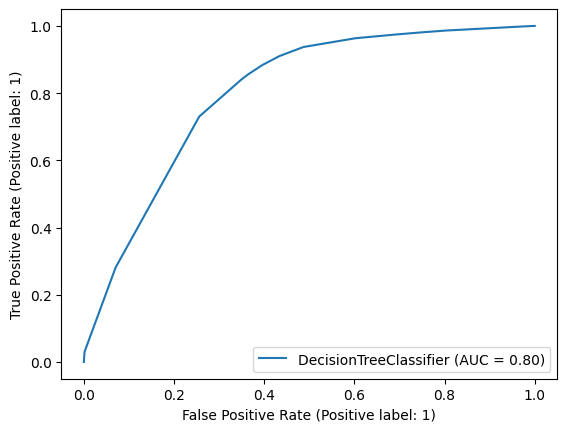

In [93]:
# Curva ROC

dtc_roc = RocCurveDisplay.from_estimator(dtc, X_test, y_test)
dtc_roc

In [94]:
# Area bajo la curva ROC

dtc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test)[:, 1])
dtc_auc

0.8021403850342759

In [95]:
# Balanced accuracy

dtc_b_acc = balanced_accuracy_score(y_test, y_pred)
dtc_b_acc

0.7455895560687709

In [131]:
data = {'Decission_Tree': [dtc_accuracy, dtc_precision, dtc_recall, dtc_m_confs, dtc_f_score, dtc_auc, dtc_b_acc]}
index = ['accuracy', 'precision', 'recall', 'confusion_matrix', 'f1_score', 'auc', 'balanced_accuracy']
dtc = pd.DataFrame(data=data, index=index)
modelos_acc = pd.merge(modelos_acc, dtc, left_index=True, right_index=True)
modelos_acc

,Reg_Logistica,K-NN,Decission_Tree
accuracy,0.754175,0.696369,0.74559
precision,0.714762,0.677275,0.706025
recall,0.838818,0.750225,0.841609
confusion_matrix,"[[20740, 10436], [5025, 26151]]","[[20031, 11145], [7787, 23389]]","[[20251, 10925], [4938, 26238]]"
f1_score,0.771837,0.711886,0.767878
auc,0.838336,0.747299,0.80214
balanced_accuracy,0.752037,0.696369,0.74559


    - Bagging classifier

In [105]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

C:\Users\alvar\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [106]:
y_pred = bagging.predict(X_test)

bc_accuracy = accuracy_score(y_test, y_pred)
bc_accuracy

0.7390300230946882

In [107]:
# Precision

bc_precision = precision_score(y_test, y_pred)
bc_precision

0.7633773945006008

In [108]:
# Recall

bc_recall = recall_score(y_test, y_pred)
bc_recall

0.6928085706954067

In [109]:
# Matriz de confusion

bc_m_confs = confusion_matrix(y_test, y_pred)
bc_m_confs

array([[24481,  6695],
       [ 9577, 21599]], dtype=int64)

In [110]:
# F-score

bc_f_score = f1_score(y_test, y_pred)
bc_f_score

0.7263830502774508

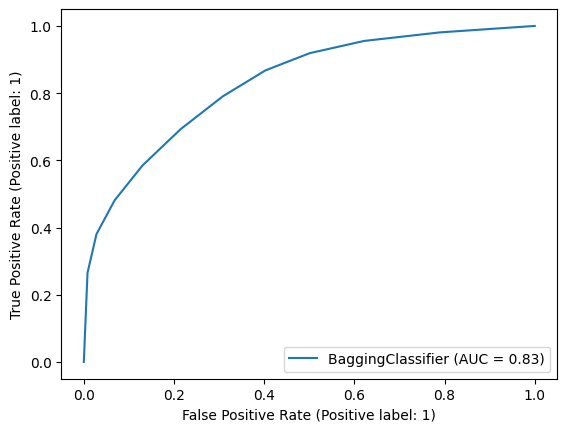

In [111]:
# Curva ROC

bc_roc = RocCurveDisplay.from_estimator(bagging, X_test, y_test)
bc_roc

In [112]:
# Area bajo la curva ROC

bc_auc = roc_auc_score(y_test, bagging.predict_proba(X_test)[:, 1])
bc_auc

0.831291361171378

In [113]:
# Balanced accuracy

bc_b_acc = balanced_accuracy_score(y_test, y_pred)
bc_b_acc

0.7390300230946882

In [132]:
data = {'Bagging': [bc_accuracy, bc_precision, bc_recall, bc_m_confs, bc_f_score, bc_auc, bc_b_acc]}
index = ['accuracy', 'precision', 'recall', 'confusion_matrix', 'f1_score', 'auc', 'balanced_accuracy']
bc = pd.DataFrame(data=data, index=index)
modelos_acc = pd.merge(modelos_acc, bc, left_index=True, right_index=True)
modelos_acc

,Reg_Logistica,K-NN,Decission_Tree,Bagging
accuracy,0.754175,0.696369,0.74559,0.73903
precision,0.714762,0.677275,0.706025,0.763377
recall,0.838818,0.750225,0.841609,0.692809
confusion_matrix,"[[20740, 10436], [5025, 26151]]","[[20031, 11145], [7787, 23389]]","[[20251, 10925], [4938, 26238]]","[[24481, 6695], [9577, 21599]]"
f1_score,0.771837,0.711886,0.767878,0.726383
auc,0.838336,0.747299,0.80214,0.831291
balanced_accuracy,0.752037,0.696369,0.74559,0.73903


    - Random forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=123)

In [120]:
y_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_accuracy

0.7488933795227097

In [121]:
# Precision

rfc_precision = precision_score(y_test, y_pred)
rfc_precision

0.7034958432771236

In [122]:
# Recall

rfc_recall = recall_score(y_test, y_pred)
rfc_recall

0.8604375160379779

In [123]:
# Matriz de confusion

rfc_m_confs = confusion_matrix(y_test, y_pred)
rfc_m_confs

array([[19870, 11306],
       [ 4351, 26825]], dtype=int64)

In [124]:
# F-score

rfc_f_score = f1_score(y_test, y_pred)
rfc_f_score

0.774092083050774

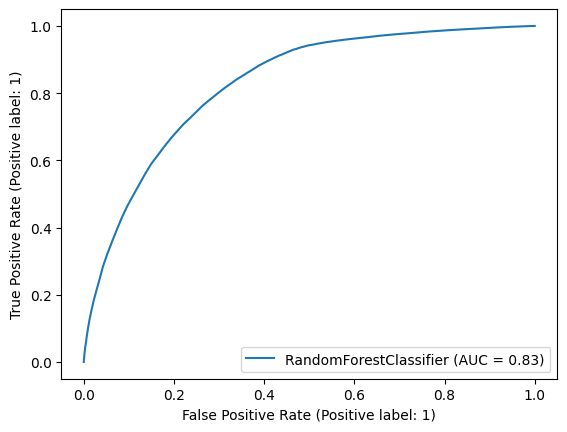

In [125]:
# Curva ROC

rfc_roc = RocCurveDisplay.from_estimator(rfc, X_test, y_test)
rfc_roc

In [126]:
# Area bajo la curva ROC

rfc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
rfc_auc

0.8280232383715483

In [127]:
# Balanced accuracy

rfc_b_acc = balanced_accuracy_score(y_test, y_pred)
rfc_b_acc

0.7488933795227097

In [133]:
data = {'Random_Forest': [rfc_accuracy, rfc_precision, rfc_recall, rfc_m_confs, rfc_f_score, rfc_auc, rfc_b_acc]}
index = ['accuracy', 'precision', 'recall', 'confusion_matrix', 'f1_score', 'auc', 'balanced_accuracy']
rfc = pd.DataFrame(data=data, index=index)
modelos_acc = pd.merge(modelos_acc, rfc, left_index=True, right_index=True)
modelos_acc

,Reg_Logistica,K-NN,Decission_Tree,Bagging,Random_Forest
accuracy,0.754175,0.696369,0.74559,0.73903,0.748893
precision,0.714762,0.677275,0.706025,0.763377,0.703496
recall,0.838818,0.750225,0.841609,0.692809,0.860438
confusion_matrix,"[[20740, 10436], [5025, 26151]]","[[20031, 11145], [7787, 23389]]","[[20251, 10925], [4938, 26238]]","[[24481, 6695], [9577, 21599]]","[[19870, 11306], [4351, 26825]]"
f1_score,0.771837,0.711886,0.767878,0.726383,0.774092
auc,0.838336,0.747299,0.80214,0.831291,0.828023
balanced_accuracy,0.752037,0.696369,0.74559,0.73903,0.748893


    - Gradient Boost

In [136]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [137]:
y_pred = gbc.predict(X_test)
gbc_accuracy = accuracy_score(y_test, y_pred)
gbc_accuracy

0.7555812163202463

In [138]:
# Precision

gbc_precision = precision_score(y_test, y_pred)
gbc_precision

0.7170052835121739

In [139]:
# Recall

gbc_recall = recall_score(y_test, y_pred)
gbc_recall

0.8444636900179625

In [140]:
# Matriz de confusion

gbc_m_confs = confusion_matrix(y_test, y_pred)
gbc_m_confs

array([[20785, 10391],
       [ 4849, 26327]], dtype=int64)

In [141]:
# F-score

gbc_f_score = f1_score(y_test, y_pred)
gbc_f_score

0.7755324476389667

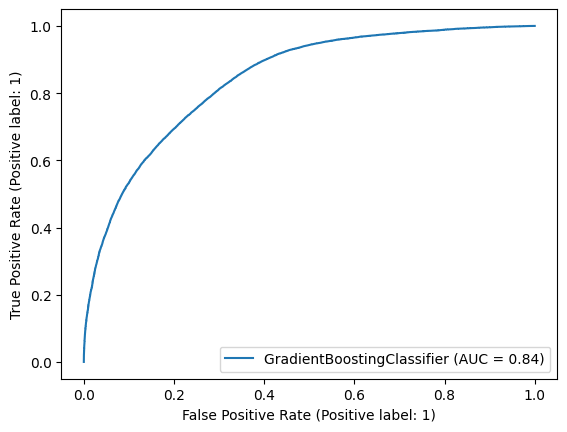

In [142]:
# Curva ROC

gbc_roc = RocCurveDisplay.from_estimator(gbc, X_test, y_test)
gbc_roc

In [143]:
# Area bajo la curva ROC

gbc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])
gbc_auc

0.8422296412582954

In [144]:
# Balanced accuracy

gbc_b_acc = balanced_accuracy_score(y_test, y_pred)
gbc_b_acc

0.7555812163202463

In [150]:
data = {'Gradient_boost': [gbc_accuracy, gbc_precision, gbc_recall, gbc_m_confs, gbc_f_score, gbc_auc, gbc_b_acc]}
index = ['accuracy', 'precision', 'recall', 'confusion_matrix', 'f1_score', 'auc', 'balanced_accuracy']
gbc = pd.DataFrame(data=data, index=index)
modelos_acc = pd.merge(modelos_acc, gbc, left_index=True, right_index=True)
modelos_acc

,Reg_Logistica,K-NN,Decission_Tree,Bagging,Random_Forest,Gradient_boost
accuracy,0.754175,0.696369,0.74559,0.73903,0.748893,0.755581
precision,0.714762,0.677275,0.706025,0.763377,0.703496,0.717005
recall,0.838818,0.750225,0.841609,0.692809,0.860438,0.844464
confusion_matrix,"[[20740, 10436], [5025, 26151]]","[[20031, 11145], [7787, 23389]]","[[20251, 10925], [4938, 26238]]","[[24481, 6695], [9577, 21599]]","[[19870, 11306], [4351, 26825]]","[[20785, 10391], [4849, 26327]]"
f1_score,0.771837,0.711886,0.767878,0.726383,0.774092,0.775532
auc,0.838336,0.747299,0.80214,0.831291,0.828023,0.84223
balanced_accuracy,0.752037,0.696369,0.74559,0.73903,0.748893,0.755581


    - XGBoost

In [ ]:
y_train[y_train==-1] = 0 # Para evitar errores con XGBoost
y_test[y_test==-1] = 0 # Para evitar errores con XGBoost

In [179]:
xgb_model = xgb.XGBClassifier(n_estimators = 200, max_depth = 10, random_state = 123)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [181]:
y_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test,y_pred)
xgb_accuracy

0.38080574801129075

In [185]:
# Precision

xgb_precision = precision_score(y_test, y_pred)
xgb_precision

0.7529173008625063

In [186]:
# Recall

xgb_recall = recall_score(y_test, y_pred)
xgb_recall

0.7616114960225815

In [187]:
#F-score

xgb_f_score = f1_score(y_test, y_pred)
xgb_f_score

0.7572394438066079

In [188]:
# Matriz de confusion

xgb_m_confs = confusion_matrix(y_test, y_pred)
xgb_m_confs

array([[23384,  7792],
       [ 7432, 23744]], dtype=int64)

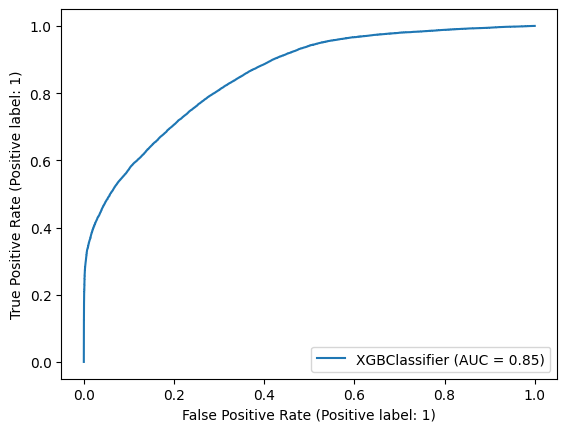

In [189]:
# Curva ROC

xgb_roc = RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
xgb_roc

In [190]:
# Area bajo la curva ROC

xgb_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
xgb_auc

0.8535077458083302

In [191]:
# Balanced accuracy

xgb_b_acc = balanced_accuracy_score(y_test, y_pred)
xgb_b_acc

0.7558378239671542

In [193]:
data = {'XG_boost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_m_confs, xgb_f_score, xgb_auc, xgb_b_acc]}
index = ['accuracy', 'precision', 'recall', 'confusion_matrix', 'f1_score', 'auc', 'balanced_accuracy']
xgb = pd.DataFrame(data=data, index=index)
modelos_acc = pd.merge(modelos_acc, xgb, left_index=True, right_index=True)
modelos_acc

,Reg_Logistica,K-NN,Decission_Tree,Bagging,Random_Forest,Gradient_boost,XG_boost
accuracy,0.754175,0.696369,0.74559,0.73903,0.748893,0.755581,0.755581
precision,0.714762,0.677275,0.706025,0.763377,0.703496,0.717005,0.717005
recall,0.838818,0.750225,0.841609,0.692809,0.860438,0.844464,0.844464
confusion_matrix,"[[20740, 10436], [5025, 26151]]","[[20031, 11145], [7787, 23389]]","[[20251, 10925], [4938, 26238]]","[[24481, 6695], [9577, 21599]]","[[19870, 11306], [4351, 26825]]","[[20785, 10391], [4849, 26327]]","[[20785, 10391], [4849, 26327]]"
f1_score,0.771837,0.711886,0.767878,0.726383,0.774092,0.775532,0.775532
auc,0.838336,0.747299,0.80214,0.831291,0.828023,0.84223,0.84223
balanced_accuracy,0.752037,0.696369,0.74559,0.73903,0.748893,0.755581,0.755581


<h2 id="p_6">Pregunta 6</h2>

Cuál de todas las métricas crees que es la más conveniente?. Ordena todos los métodos de mejor a peor según dichas métricas. (0,5pt)

- Si consideramos la medida del area bajo la curva roc como la metrica mas conveniente, nos quedaria el siguiente orden

In [198]:
modelos_acc[modelos_acc.iloc[5].sort_values(ascending=False).index]

,Gradient_boost,XG_boost,Reg_Logistica,Bagging,Random_Forest,Decission_Tree,K-NN
accuracy,0.755581,0.755581,0.754175,0.73903,0.748893,0.74559,0.696369
precision,0.717005,0.717005,0.714762,0.763377,0.703496,0.706025,0.677275
recall,0.844464,0.844464,0.838818,0.692809,0.860438,0.841609,0.750225
confusion_matrix,"[[20785, 10391], [4849, 26327]]","[[20785, 10391], [4849, 26327]]","[[20740, 10436], [5025, 26151]]","[[24481, 6695], [9577, 21599]]","[[19870, 11306], [4351, 26825]]","[[20251, 10925], [4938, 26238]]","[[20031, 11145], [7787, 23389]]"
f1_score,0.775532,0.775532,0.771837,0.726383,0.774092,0.767878,0.711886
auc,0.84223,0.84223,0.838336,0.831291,0.828023,0.80214,0.747299
balanced_accuracy,0.755581,0.755581,0.752037,0.73903,0.748893,0.74559,0.696369


<h2 id="p_7">Pregunta 7</h2>

En esta curso, no hemos abordado todavía la importancia de hacer una correcta preselección y transformación de variables antes de entrenar un modelo. Sin embargo, los ensambladores nos pueden dar una buena pista de qué variables elegir a la hora de entrenar un modelo de clasificación o regresión.  ¿Cómo medirías que importancia tiene cada variable a la hora de clasificar correctamente la variable objetivo? Haciendo uso de alguno de los métodos propuestos, Muestra una gráfica que presente de forma ordenada la importancia que tiene cada variable en la clasificación (0,5pt)

- En la regresion logistica, por ejemplo, se puede estudiar, primero el p-valor de cada variable (para, a traves del contraste de hipotesis de significacion nula o coeficiente igual a 0, considerar si es o no relevante a la hora de predecir la variable dependiente), y entre las variables con significacion no nula, se puede ver cuales cobran mayor importancia segun cuales tengan un mayor coeficiente